# Generating Point Cloud from depth image
This notebook takes a depth image and converts it into a point cloud to display.

First thing to do is import all needed libraries

In [1]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import datetime

/Users/jornvandijck/Documents/HAMK/IctProject/HamkSmartBiomass/pointCloud/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Preparing the data
Next step is to define callibration data for the camera. This data is not perfect for our camera but it does the job for now.

In [2]:
# Depth camera parameters:
FX_DEPTH = 5.8262448167737955e+02
FY_DEPTH = 5.8269103270988637e+02
CX_DEPTH = 3.1304475870804731e+02
CY_DEPTH = 2.3844389626620386e+02

Reading the image is the next part. This takes the image in as a numpy array. After, we display some usefull data about the image array.

In [3]:
# Open the image and display basic information
depth_image = iio.imread("./images/png/depth/2023-11-09.16.22.35_depth_image.png")

print(f"Image resolution: {depth_image.shape}")
print(f"Data type: {depth_image.dtype}")
print(f"Min value: {np.min(depth_image)}")
print(f"Max value: {np.max(depth_image)}")

Image resolution: (480, 848, 3)
Data type: uint8
Min value: 0
Max value: 253


Next up is calculating the grayscale image that we will need to generate the pointcloud. For development and debugging reasons, this will exported to a png file as well.

In [4]:
depth_grayscale = np.array(256 * depth_image / 0x0fff, dtype=np.uint8)
iio.imwrite(f"output/grayscale_{datetime.datetime.now().strftime('%Y%m%d_%H:%M:%S.%f')[:-3]}.png", depth_grayscale)

This cell is purely go show the depth image and the grayscale image next to each other. This is an easy way to quickly check if the grayscale image calculation was successfull.

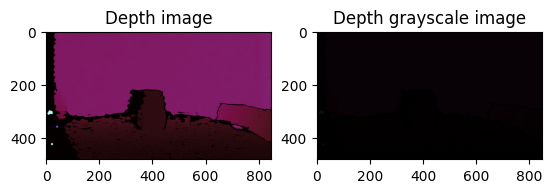

In [5]:
# Display depth and grayscale image:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(depth_image, cmap="gray")
axs[0].set_title('Depth image')
axs[1].imshow(depth_grayscale, cmap="gray")
axs[1].set_title('Depth grayscale image')
plt.show()

### Generating the point cloud
Only two things left: generating the point cloud point coordinates and displaying the point cloud. The next cell does the first thing. It takes into account the callibration data defined earlier.

In [6]:
# compute point cloud:
pcd = []
depth_image.shape
height, width, index = depth_image.shape
for i in range(height):
    for j in range(width):
        z = (depth_image[i][j])
        x = ((j - CX_DEPTH) * z / FX_DEPTH)
        y = ((i - CY_DEPTH) * z / FY_DEPTH)
        pcd.append([x[0], y[0], z[0]])

[103.46676595500571, -26.677635057777938, 128]


Last step: Generate and show the point cloud itself. This cell converts the array of point coordinates to a 3d vector type. This is drawn and visualised with the open3d module.

In [ ]:
pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd)  # set pcd_np as the point cloud points
# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])